In [10]:
import cv2
import os

main_folder_path = "Dataset/Dataset/Merged"

images = []  # List to store images
labels = []  # List to store labels

# Iterate over each folder in the main folder
for folder_name in os.listdir(main_folder_path):
    folder_path = os.path.join(main_folder_path, folder_name)
    
    # Check if the current item is a directory
    if os.path.isdir(folder_path):
        # List all files in the subfolder
        files = os.listdir(folder_path)
        
        # Filter out only image files
        image_files = [f for f in files if f.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif'))]
        
        # Iterate over each image file
        for image_file in image_files:
            # Open each image using OpenCV
            image_path = os.path.join(folder_path, image_file)
            img = cv2.imread(image_path)
            
            # Append the image to the images list
            images.append(img)
            
            # Append the label (folder name) to the labels list
            labels.append(folder_name)


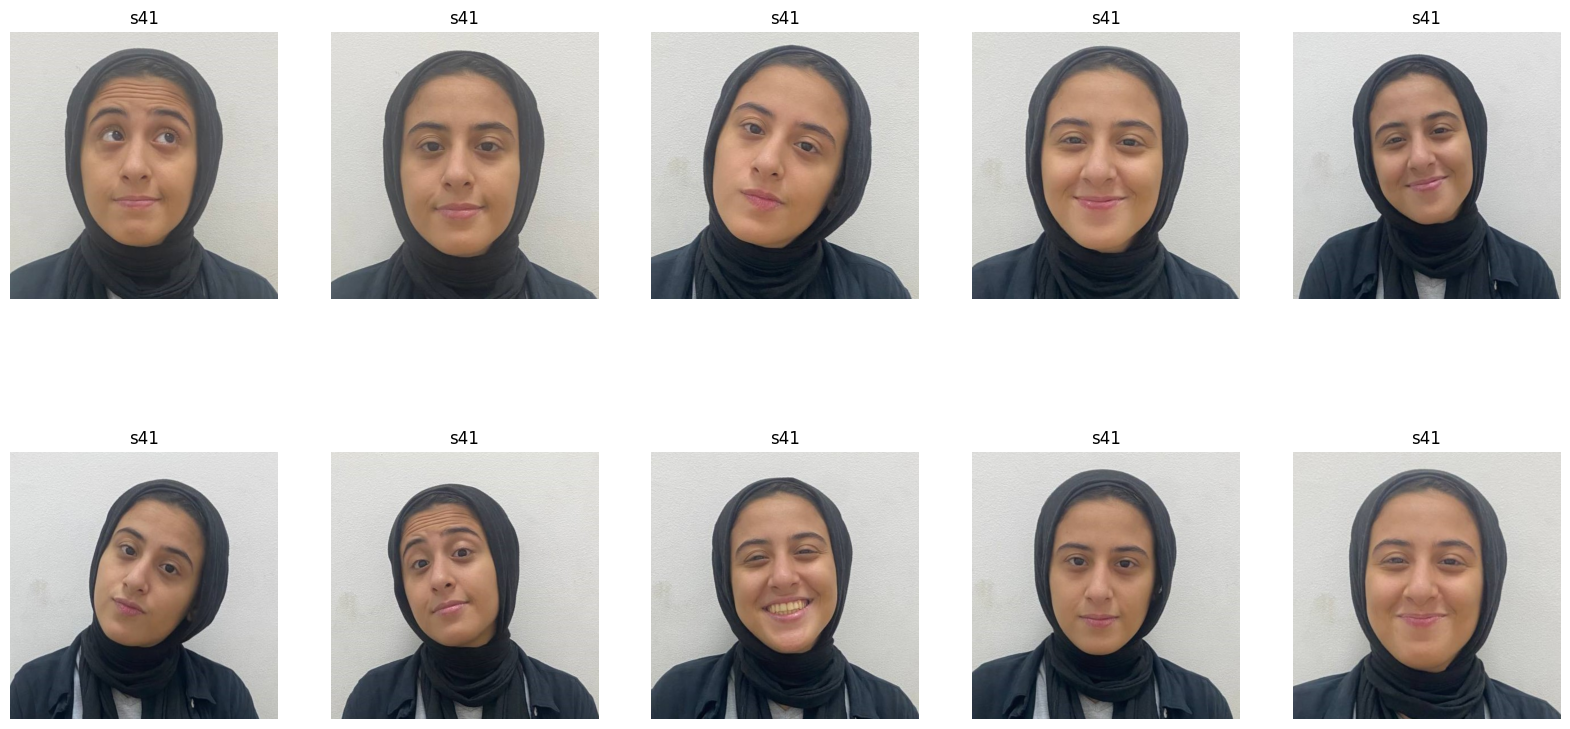

In [13]:

import matplotlib.pyplot as plt

# Plot the first 10 images
num_images_to_plot = 10
plt.figure(figsize=(20, 10))
for i in range(num_images_to_plot):
    plt.subplot(2, 5, i + 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(labels[i])
    plt.axis('off')

plt.show()

In [14]:
equalized_imgs = []
for img in images:
    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Apply histogram equalization to improve contrast
    equalized_img = cv2.equalizeHist(gray_img)

    equalized_imgs.append(equalized_img)

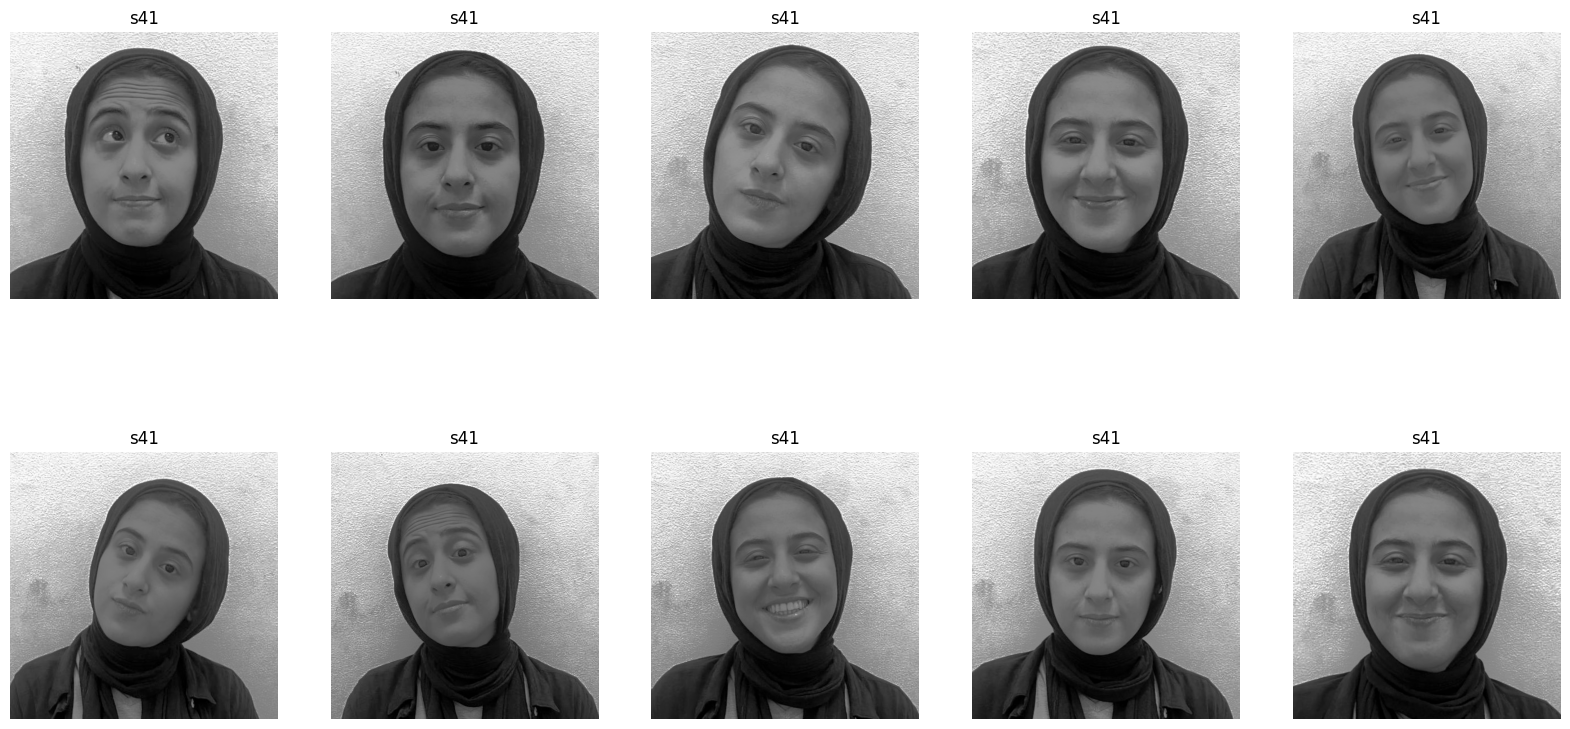

In [15]:

import matplotlib.pyplot as plt

# Plot the first 10 images
num_images_to_plot = 10
plt.figure(figsize=(20, 10))
for i in range(num_images_to_plot):
    plt.subplot(2, 5, i + 1)
    plt.imshow(cv2.cvtColor(equalized_imgs[i], cv2.COLOR_BGR2RGB))
    plt.title(labels[i])
    plt.axis('off')

plt.show()

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(equalized_imgs, labels, test_size=0.3, random_state=42)


In [18]:

# Load the cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Read the input image
img = cv2.imread('OIP.jpeg')

# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Display the output
cv2.imshow('img', img)
cv2.waitKey()

-1